# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# I am checking the length of cities because I want to analyze at least 500 cities . . .
# so if the len of cities is less than 500 I will rerun this code 
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Before looping through the cities I am going to set up the base url
url = "http://api.openweathermap.org/data/2.5/weather?"
# Units = imperial gives the temperature in farenheit
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + cities[0]).json()

In [5]:
#Create empty lists and initialize variables
temp = []
humid = []
cloudiness =[]
ws = []
country = []
lat = []
lon = []
found_cities =[]

# Loop through the list of cities and perform a request for data on each
# Not every city is in the Open Weather API so I am preparing for the possibility of an error
for x in range(len(cities)):
    try:
        response = requests.get(query_url + cities[x]).json()
        found_cities.append(response['name'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        print(f"FOUND IN API: City Number {x} Name {cities[x]}")
    except KeyError:
        print(f"NOT FOUND IN API: City Number {x} Name {cities[x]}")

FOUND IN API: City Number 0 Name ushuaia
FOUND IN API: City Number 1 Name zunyi
FOUND IN API: City Number 2 Name rikitea
FOUND IN API: City Number 3 Name samana
FOUND IN API: City Number 4 Name hilo
FOUND IN API: City Number 5 Name nikolskoye
FOUND IN API: City Number 6 Name longyearbyen
FOUND IN API: City Number 7 Name albany
FOUND IN API: City Number 8 Name guadalajara
FOUND IN API: City Number 9 Name mitchell
NOT FOUND IN API: City Number 10 Name mys shmidta
FOUND IN API: City Number 11 Name hobart
FOUND IN API: City Number 12 Name clyde river
FOUND IN API: City Number 13 Name santa isabel do rio negro
FOUND IN API: City Number 14 Name saint-philippe
FOUND IN API: City Number 15 Name kiunga
FOUND IN API: City Number 16 Name new norfolk
FOUND IN API: City Number 17 Name paramonga
FOUND IN API: City Number 18 Name mataura
FOUND IN API: City Number 19 Name te anau
FOUND IN API: City Number 20 Name iberia
FOUND IN API: City Number 21 Name lebu
NOT FOUND IN API: City Number 22 Name senty

FOUND IN API: City Number 186 Name ambilobe
FOUND IN API: City Number 187 Name vanavara
NOT FOUND IN API: City Number 188 Name nizhneyansk
FOUND IN API: City Number 189 Name mount gambier
FOUND IN API: City Number 190 Name xichang
FOUND IN API: City Number 191 Name mecca
FOUND IN API: City Number 192 Name zhigansk
NOT FOUND IN API: City Number 193 Name rawannawi
FOUND IN API: City Number 194 Name xique-xique
FOUND IN API: City Number 195 Name egvekinot
FOUND IN API: City Number 196 Name arlit
FOUND IN API: City Number 197 Name axim
FOUND IN API: City Number 198 Name huarmey
FOUND IN API: City Number 199 Name husavik
FOUND IN API: City Number 200 Name harper
FOUND IN API: City Number 201 Name lakselv
FOUND IN API: City Number 202 Name gao
FOUND IN API: City Number 203 Name mackenzie
FOUND IN API: City Number 204 Name la union
FOUND IN API: City Number 205 Name sedro-woolley
FOUND IN API: City Number 206 Name touros
NOT FOUND IN API: City Number 207 Name labutta
FOUND IN API: City Number

FOUND IN API: City Number 371 Name borovskoy
NOT FOUND IN API: City Number 372 Name ondorhaan
FOUND IN API: City Number 373 Name calabozo
FOUND IN API: City Number 374 Name saint george
FOUND IN API: City Number 375 Name tulungagung
FOUND IN API: City Number 376 Name panzhihua
FOUND IN API: City Number 377 Name diphu
FOUND IN API: City Number 378 Name sovetskiy
FOUND IN API: City Number 379 Name amudat
FOUND IN API: City Number 380 Name davila
FOUND IN API: City Number 381 Name godo
FOUND IN API: City Number 382 Name merauke
FOUND IN API: City Number 383 Name lubao
NOT FOUND IN API: City Number 384 Name chagda
FOUND IN API: City Number 385 Name bullhead city
FOUND IN API: City Number 386 Name williamsburg
FOUND IN API: City Number 387 Name cockburn town
FOUND IN API: City Number 388 Name lipin bor
FOUND IN API: City Number 389 Name macusani
FOUND IN API: City Number 390 Name togul
FOUND IN API: City Number 391 Name narsaq
NOT FOUND IN API: City Number 392 Name mudyuga
FOUND IN API: Cit

FOUND IN API: City Number 555 Name fond du lac
FOUND IN API: City Number 556 Name puerto cabezas
FOUND IN API: City Number 557 Name flinders
FOUND IN API: City Number 558 Name utica
NOT FOUND IN API: City Number 559 Name tarudant
NOT FOUND IN API: City Number 560 Name jahrom
FOUND IN API: City Number 561 Name buraydah
FOUND IN API: City Number 562 Name dudinka
FOUND IN API: City Number 563 Name portland
FOUND IN API: City Number 564 Name sioux lookout
FOUND IN API: City Number 565 Name baykit
FOUND IN API: City Number 566 Name pidhorodne
FOUND IN API: City Number 567 Name ballina
FOUND IN API: City Number 568 Name muros
FOUND IN API: City Number 569 Name kailua
FOUND IN API: City Number 570 Name santa rosa
FOUND IN API: City Number 571 Name aksarka
FOUND IN API: City Number 572 Name taoudenni
FOUND IN API: City Number 573 Name isakly
NOT FOUND IN API: City Number 574 Name ruatoria
FOUND IN API: City Number 575 Name tirau
FOUND IN API: City Number 576 Name boueni
FOUND IN API: City Numb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#This is to check that the data has at least 500 cities
print(len(found_cities))

# Create an index list
index_list = []
for x in range(len(found_cities)):
    index_list = []

578


In [7]:
# Create dataframe with the data read in from the API
city_weather_df = pd.DataFrame(index_list)
city_weather_df["City"] = found_cities
city_weather_df["Latitude"] = lat
city_weather_df["Longitude"] = lon
city_weather_df["Country"] = country
city_weather_df["Temperature (F)"] = temp
city_weather_df["Humidity %"] = humid
city_weather_df["Cloudiness %"] = cloudiness
city_weather_df["Wind Speed (mph)"] = ws

# Write dataframe to a csv file 
city_weather_df.to_csv("output_data/cities.csv", header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Remove all rows in dataframe where Humididty is over 100%
city_weather_df = city_weather_df.loc[city_weather_df["Humidity %"]<100,:]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

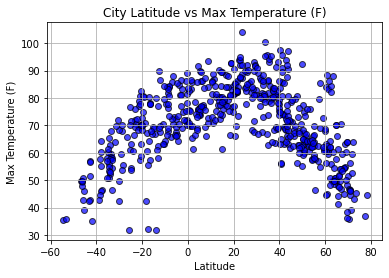

In [9]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Temperature (F)"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_MaxTemp.png")
plt.show()

The scatterplot above shows the relationship between Maximum Temperature in farenheit and the Latitude of over 500 cities around the world. It shows the relationship that anyone would expect which parabolic relationship where cities closer to a latitude of 0 (the equator) are hotter and cities further from the equator are colder. 

## Latitude vs. Humidity Plot

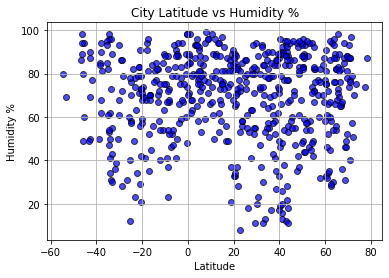

In [10]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity %"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity %")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_Humidity%.png")
plt.show()

The scatterplot above shows the relationship between latitude and humidity % of over 500 cities around the world. There is no relationship between the variables in the scatterplot so I can not conclude there is a relationship between City Latitude and Humidity %

## Latitude vs. Cloudiness Plot

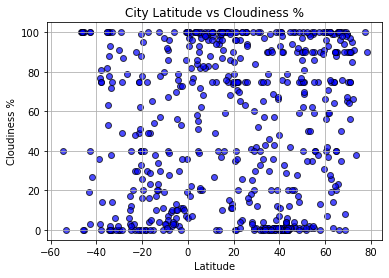

In [11]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness %"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness %")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_Cloudiness%.png")
plt.show()

The Scatterplot above plots City Latitude vs Cloudiness % for over 500 cities around the world. There is no relationship shown in the scatterplot, so I can not conclude any relationship between City Latitude and Cloudiness %.

## Latitude vs. Wind Speed Plot

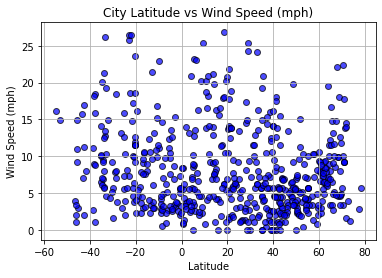

In [12]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed (mph)"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_WindSpeed(mph).png")
plt.show()

The Scatterplot above plots City Latitude vs Wind Speed (mph) for over 500 cities around the world. There is no relationship evident by looking at the scatterplot so I cannot conclude that there is a relationship between City Latitude and Wind Speed in mph. 

## Linear Regression

In [13]:
# First I have to spilt the 2 dataframes one for the Northern Hemisphere and one for the Southern Hemisphere
northern_df = city_weather_df.loc[city_weather_df["Latitude"]>=0,:]
southern_df = city_weather_df.loc[city_weather_df["Latitude"]<0,:]
print(len(city_weather_df))
print(len(northern_df))
print(len(southern_df))

574
402
172


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max Temperature (F) is -0.63


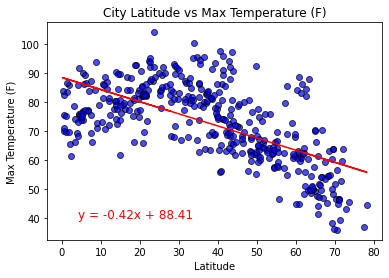

In [16]:
# Add the linear regression equation and line to plot
x_values = northern_df['Latitude']
y_values = northern_df['Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,40),fontsize=12,color="red")
plt.title("City Latitude vs Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("output_data/Northern_Lat_vs_MaxTemp.png")

correlation = st.pearsonr(northern_df['Latitude'], northern_df['Temperature (F)'])
print(f"The correlation coefficient between Latitude and Max Temperature (F) is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = northern_df['Latitude']
y_values = northern_df['Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,40),fontsize=12,color="red")
plt.title("City Latitude vs Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("output_data/Northern_Lat_vs_MaxTemp.png")

correlation = st.pearsonr(northern_df['Latitude'], northern_df['Temperature (F)'])
print(f"The correlation coefficient between Latitude and Max Temperature (F) is {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression